# Predicting Employee Exit

### Overview:

In this project, we will test out several algorithms to accurate a model predicting an employee's exit from a company.

This is dataset useful for HR in a company. A company records different parameters of an employee (such as satisfaction level, Salary, number of promotion, left the company etc.) .

This dataset can be used to predict whether an employee leave the company or stay in the company.

## Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import itertools
import seaborn as sns ; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

## Data

* `Satisfaction Level` - satisfaction level at job of an employee.

* `Last Evaluation` - Rating between 0 to 1, received by an employee at his last evaluation.
* `Number Projects` - Number of projects, an employee involved in.
* `Average Monthly Hours` - Average number of hours in a month, spent by an employee at office.
* `Time Spend Company` - Number of years spent in the company.
* `Work Accident` - 0 = no accident during employee stay, 1 = accident during employee stay.
* `Left` - 0 indicates employee stays in the company, 1 indicates - employee left the company.
* `Promotion Last 5 years` - Number of promotions in his stay.
* `Department` - Department, an employee belongs to.
* `Salary` - Salary in USD.

In [10]:
emp_data = pd.read_csv('data/emp.csv')
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
emp_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [12]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [18]:
emp_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
columns = emp_data.columns.tolist()

In [31]:
categorical  = ['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Department','salary']

<ipython-input-32-5f563fb748d6>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-32-5f563fb748d6>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-32-5f563fb748d6>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-32-5f563fb748d6>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-32-5f563fb748d6>:4: MatplotlibDeprecationWarn

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'management'),
  Text(6, 0, 'IT'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'marketing'),
  Text(9, 0, 'RandD')])

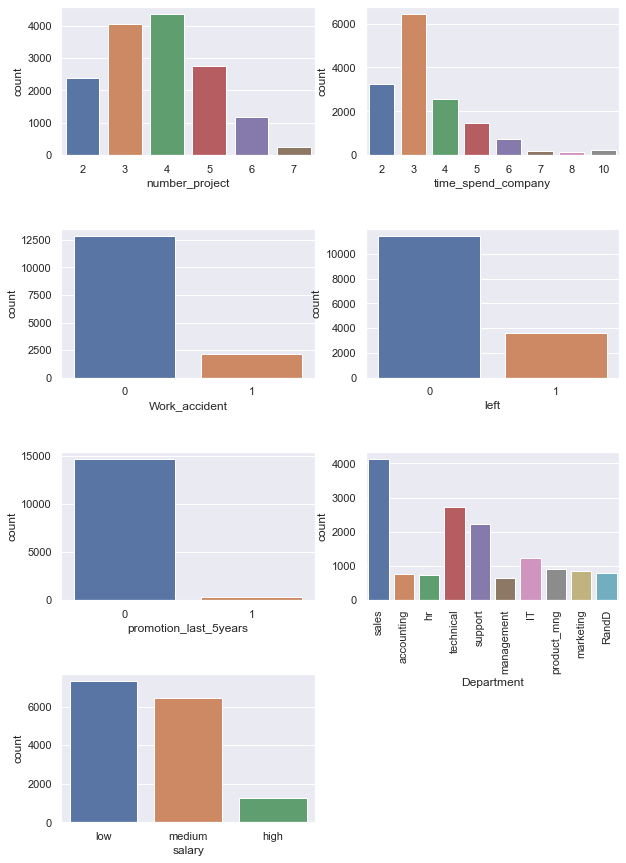

In [32]:
fig = plt.subplots(figsize=(10,15))
length = len(categorical)
for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x=i, data= emp_data)
    
plt.subplot(np.ceil(length/2),2,6)
plt.xticks(rotation=90)

In [27]:
i = zip(categorical,range(6))

In [28]:
next(i)

('number_project', 0)

In [33]:
categorical  = ['number_project','time_spend_company','Work_accident','promotion_last_5years','Department','salary']

<ipython-input-34-9b5b9d173cb2>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-34-9b5b9d173cb2>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-34-9b5b9d173cb2>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-34-9b5b9d173cb2>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-34-9b5b9d173cb2>:6: MatplotlibDeprecationWarn

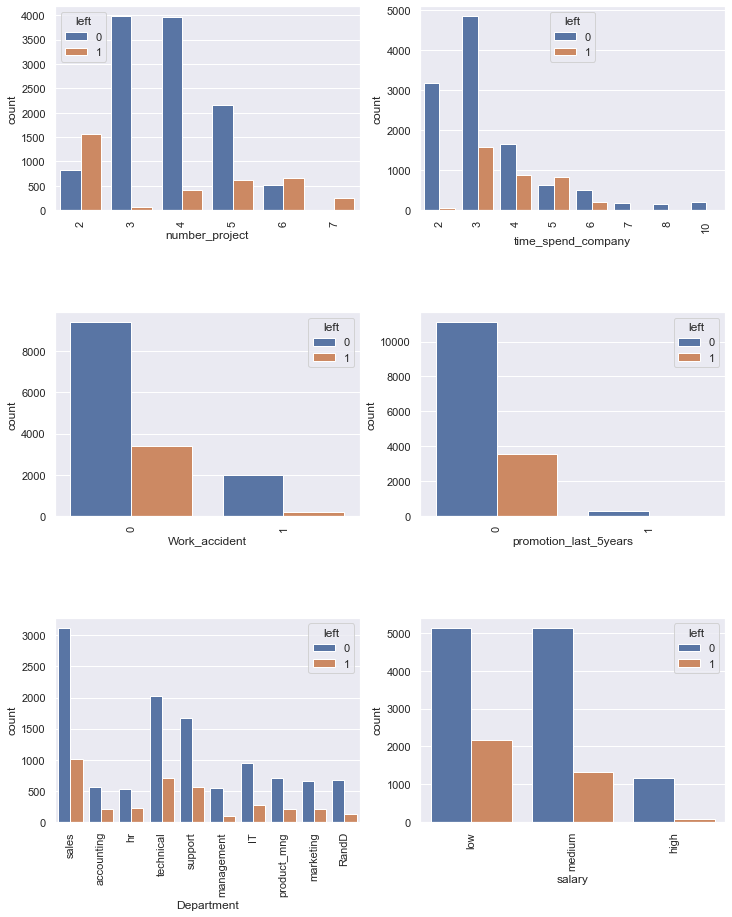

In [34]:
fig=plt.subplots(figsize=(12,15))

length = len(categorical)

for i,j in itertools.zip_longest(categorical,range(length)):
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    #Based on left colum, splits the data
    sns.countplot(x=i,data = emp_data, hue="left")
    plt.xticks(rotation=90)

### Observations

* Those who were promoted in last 5 years didn't leave the company
* Those who have spent 5 years in company are more in proportion compared to people staying back
* More than 6 years, people dont leave company anymore
* People who have done more than 7 projects have left the company.
* more than 6 years experience are not leaving company & more than 7 years are not staying back.

#### Conclusion:
* Employee's who did many projects at a faster rate are leaving company.

<ipython-input-36-2a40005440db>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-36-2a40005440db>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-36-2a40005440db>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-36-2a40005440db>:18: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(np.ceil(length/2),2,j+1)
<ipython-input-36-2a40005440db>:18: MatplotlibDeprecatio

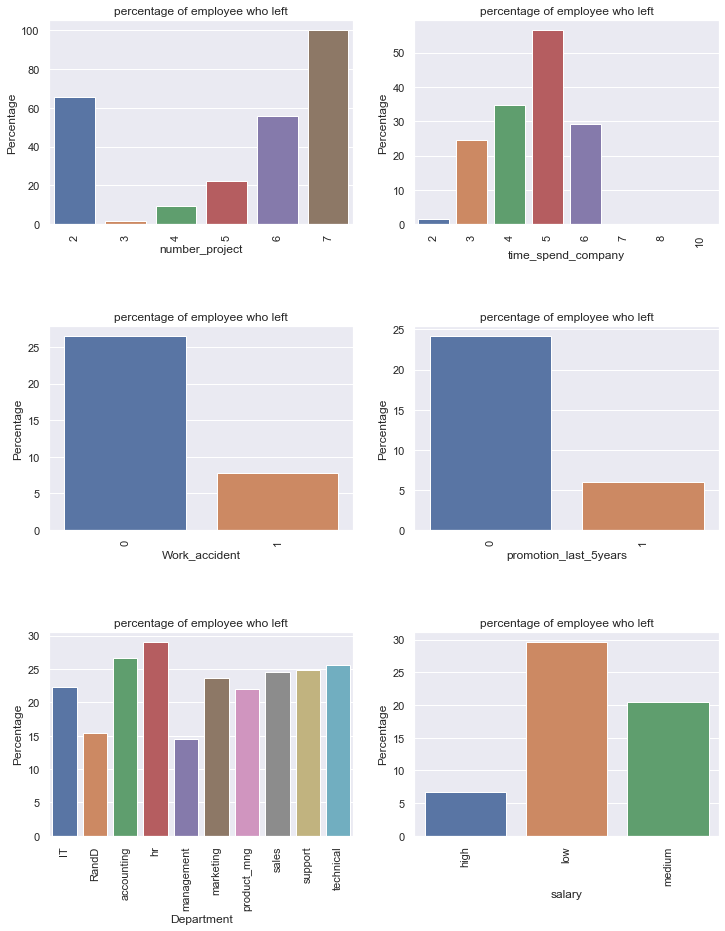

In [36]:
categorical=['number_project','time_spend_company','Work_accident','promotion_last_5years','Department','salary']
length = len(categorical)

fig=plt.subplots(figsize=(12,15))
for i,j in itertools.zip_longest(categorical,range(length)):
    # only counting the number who left 
    Proportion_of_data = emp_data.groupby([i])['left'].agg(lambda x: (x==1).sum()).reset_index()
    
    # Counting the total number 
    Proportion_of_data1=emp_data.groupby([i])['left'].count().reset_index() 
    
    # mergeing two data frames
    Proportion_of_data2 = pd.merge(Proportion_of_data,Proportion_of_data1,on=i) 
    
    # Now we will calculate the % of employee who left category wise
    Proportion_of_data2["Proportion"]=(Proportion_of_data2['left_x']/Proportion_of_data2['left_y'])*100 
    
    plt.subplot(np.ceil(length/2),2,j+1)
    plt.subplots_adjust(hspace=.5)
    sns.barplot(x=i,y='Proportion',data=Proportion_of_data2)
    plt.xticks(rotation=90)
    plt.title("percentage of employee who left")
    plt.ylabel('Percentage')

## Feature Engineering

* Discover important features for prediction.
* Randomforest for finding important feature prediction

In [37]:
corr = emp_data.corr()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'satisfaction_level'),
  Text(1.5, 0, 'last_evaluation'),
  Text(2.5, 0, 'number_project'),
  Text(3.5, 0, 'average_montly_hours'),
  Text(4.5, 0, 'time_spend_company'),
  Text(5.5, 0, 'Work_accident'),
  Text(6.5, 0, 'left'),
  Text(7.5, 0, 'promotion_last_5years')])

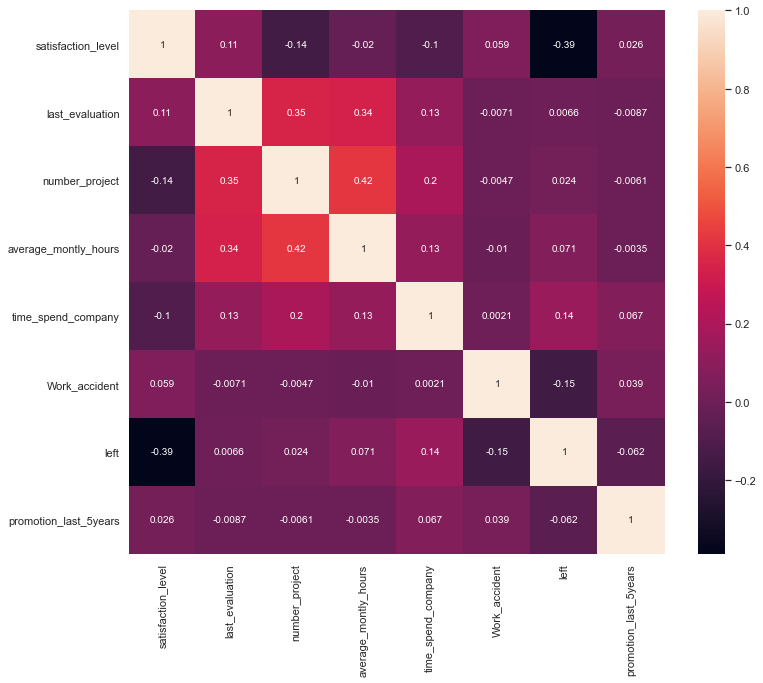

In [38]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,cbar=True)
plt.xticks(rotation=90)

## Data Processing

In [42]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

emp_data['salary'] = le.fit_transform(emp_data['salary'])
emp_data['Department'] = le.fit_transform(emp_data['Department'])

In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)

feature_var = emp_data.loc[:,emp_data.columns != "left"]

pred_var = emp_data.loc[:,emp_data.columns == "left"]

In [51]:
pred_var.values.ravel()

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
model.fit(feature_var,pred_var.values.ravel())

RandomForestClassifier()

In [53]:
feature_var.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [54]:
pd.Series(model.feature_importances_,index=feature_var.columns).sort_values(ascending=False)

satisfaction_level       0.341152
time_spend_company       0.179027
number_project           0.178436
average_montly_hours     0.153649
last_evaluation          0.120998
Department               0.011929
salary                   0.008211
Work_accident            0.005994
promotion_last_5years    0.000602
dtype: float64

## Model Building

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [58]:
def Classification_model(model,Data,x,y):
    train,test = train_test_split(Data,test_size=0.33)
    train_x = Data.loc[train.index,x]
    train_y = Data.loc[train.index,y]
    test_x = Data.loc[test.index,x]
    test_y = Data.loc[test.index,y]
    
    model.fit(train_x,train_y.values.ravel())
    
    pred = model.predict(test_x)
    
    accuracy = accuracy_score(test_y,pred)
    return accuracy

In [72]:
All_features=['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation',
'Department',
'salary',
'Work_accident',       
'promotion_last_5years']

In [73]:
Important_features = ['satisfaction_level',
'number_project',
'time_spend_company',
'average_montly_hours',
'last_evaluation']

In [74]:
pred_var = ['left']

models = ["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

In [75]:
Classification_models = [RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=7),LogisticRegression(),SVC()]

## Model Evaluations

In [76]:
model_accuracy = []

In [77]:
for model in Classification_models:
    accuracy = Classification_model(model,emp_data,Important_features,pred_var)
    model_accuracy.append(accuracy)

In [78]:
model_accuracy

[0.9892929292929293,
 0.7913131313131313,
 0.9494949494949495,
 0.761010101010101,
 0.78]

In [79]:
model_accuracy = []

for model in Classification_models:
    accuracy = Classification_model(model,emp_data,All_features,pred_var)
    model_accuracy.append(accuracy)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
model_accuracy

[0.9913131313131314,
 0.7907070707070707,
 0.9197979797979798,
 0.7636363636363637,
 0.7993939393939394]

Thereby, The model tested out to have an accuracy of **99%**